## Colab Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
"""
Change directory to where this file is located
"""
%cd 'COPY&PASTE FILE DIRECTORY HERE'

## Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

## Beta Distribution

In [9]:
class BetaDistribution:
    """ class for modeling Beta distribution over alpha, beta"""

    def __init__(self, a=0.5, b=0.5):
        """
        Initializes the model parameters: alpha and beta.

        Do NOT Modify this method.

        Inputs
        - a: alpha
        - b: beta
        """
        self.a = a
        self.b = b

    def forward(self, X):
        """
        forward pass of the model.

        Do NOT Modify this method.

        Inputs
        - X: a numpy array of training data of the shape (N,)
        Returns
        - outputs: the probability of X following the beta distribution defined by the model parameters.
        """
        beta_func = special.beta(self.a, self.b)
        outputs = 1/beta_func * np.power(X, self.a-1) * np.power(1-X, self.b-1)
        return outputs

    def compute_loss(self, X):
        """
        Computes the loss for gradient descent using the log-likelihood of the model.

        Question (a)
        - hint: use special.beta for beta function.

        Inputs
        - X: a numpy array of training data of the shape (N,)
        Returns
        - loss: a float of loss
        """
        ##################
        # IMPLEMENT HERE #
        
        beta_func = special.beta(self.a, self.b)
        
        log_likelihood = -np.log(beta_func) + (self.a-1)*np.sum(np.log(X)) + (self.b-1)*np.sum(np.log(1-X))
        
        loss = log_likelihood
        ##################
        return loss

    def backward(self, X):
        """
        Computes the gradients of the loss function with respect to the model parameters.

        Question (b)
        - hint: use special.polygamma for psi function.

        Inputs
        - X: a numpy array of training data of the shape (N,)
        Returns
        - gradients: a dictionary containing 'alpha' and 'beta' as keys with their corrresponding gradients as values.
        """
        ##################
        # IMPLEMENT HERE #
        ##################
        N = X.shape[0]
        delta_alpha = N * special.polygamma(0, self.a + self.b) - N * special.polygamma(0, self.a) + np.sum(np.log(X))
        delta_beta = N * special.polygamma(0, self.a + self.b) - N * special.polygamma(0, self.b) + np.sum(np.log(1-X))
        return {'alpha' : delta_alpha, 'beta' : delta_beta}


    def train(self, X, lr, n_epochs, log_interval=10):
        """
        Runs gradient descent

        Do NOT Modify this method.

        Inputs
        - X
        - lr
        - n_epochs
        - log_interval
        Returns
        - history
        """
        history = []
        for epoch in range(n_epochs):
            self.train_step(X, lr)
            if epoch % log_interval==0:
                loss = self.compute_loss(X)
                history.append((loss, self.a, self.b))
        return history

    

    def train_step(self, X, lr):
        """
        Updates the parameters using gradient descent

        Question (c)

        Inputs
        - X
        - lr: learning rate
        """
        ##################
        # IMPLEMENT HERE #
        ##################
        # Calculate gradients
        gradients = self.backward(X)
        
        # Update alpha and beta
        self.a -= lr * gradients['alpha']
        self.b -= lr * gradients['beta']

## Gradient Descent for Parameter Estimation

In [115]:
###
# Question (d)
# Run a gradient descent, and plot the training history.
# You will have a reasonable plot if your implementation of the model is right.
###

In [10]:
# sample data from beta distribution
alpha, beta, size = 2, 3, 500
X = np.random.beta(alpha, beta, size=size)

# model instantiation
model = BetaDistribution(a=0.5, b=0.5)

# train the model
lr, n_epochs = 0.1, 1500
history = model.train(X, lr, n_epochs, log_interval=10)

/var/folders/yz/q0p25ldn1cd79tm719622_t00000gn/T/ipykernel_73453/4053861988.py:49: RuntimeWarning: invalid value encountered in log
  log_likelihood = -np.log(beta_func) + (self.a-1)*np.sum(np.log(X)) + (self.b-1)*np.sum(np.log(1-X))
/var/folders/yz/q0p25ldn1cd79tm719622_t00000gn/T/ipykernel_73453/4053861988.py:49: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -np.log(beta_func) + (self.a-1)*np.sum(np.log(X)) + (self.b-1)*np.sum(np.log(1-X))


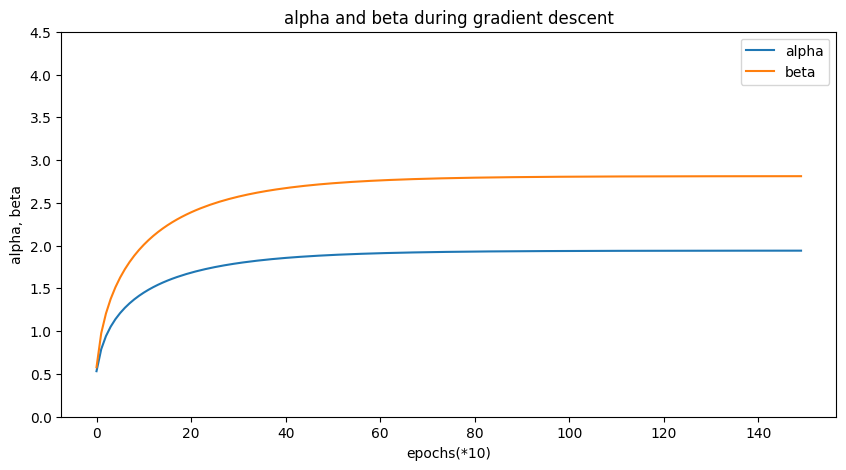

In [4]:
# visualize gradient descent history
losses, alphas, betas = list(zip(*history))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set(title="alpha and beta during gradient descent")
ax.set(xlabel='epochs(*10)', ylabel='alpha, beta')
ax.plot(alphas)
ax.plot(betas)
ax.set(yticks=np.arange(0,max(alpha,beta)+2,0.5))
ax.legend(['alpha', 'beta'])
plt.show()

## Experiment

In [ ]:
###
# Question (e)
# Run gradient descents 100 times, and plot the histograms of alphas and betas.
# You will have a reasonable plot if your implementation of the model is right.
###

In [12]:
lr = 0.1
n_epochs = 1000
n_experiments = 100
alpha, beta, size = 2, 3, 500

In [18]:
alphas = []
betas = []
for exp_id in range(n_experiments):
    X = np.random.beta(alpha, beta, size=size)
    model = BetaDistribution(a=0.5, b=0.5)
    history = model.train(X, lr, n_epochs)
    alphas.append(model.a)
    betas.append(model.b)

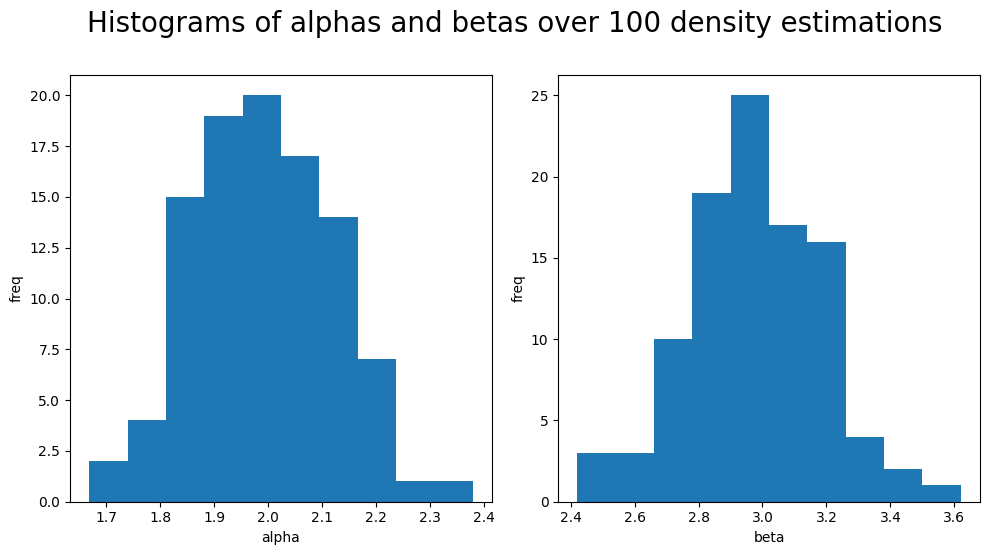

In [19]:
# Visualize the result
fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].hist(alphas)
axes[0].set(title="")
axes[0].set(xlabel='alpha', ylabel='freq')

axes[1].hist(betas)
axes[1].set(title="")
axes[1].set(xlabel='beta', ylabel='freq')

fig.tight_layout()
plt.suptitle("Histograms of alphas and betas over 100 density estimations", x=0.52, y=1.1, size=20, weight=1)
plt.show()

In [20]:
np.std(alphas)

0.12629640571013614